In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [ ]:
import pandas as pd
#data= pd.read_csv("/content/drive/MyDrive/merged_jan2010_Jul2023.csv", index_col=None)

data=pd.read_csv('/content/drive/MyDrive/merged_jan2010_Jul2023.csv', parse_dates=['Occurrence Date'], dtype={'Beat': str, 'ZIP Code': str, 'Offense Count': float, 'Incident': float})

<ipython-input-3-ec82243fbf57>:4: DtypeWarning: Columns (1,6,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/drive/MyDrive/merged_jan2010_Jul2023.csv', parse_dates=['Occurrence Date'], dtype={'Beat': str, 'ZIP Code': str, 'Offense Count': float, 'Incident': float})


## Univariate Analysis

In [ ]:
# Size of the dataset
print("NB Rows:", data.shape[0])
print("NB Columns:", data.shape[1])

NB Rows: 2307150
NB Columns: 17


In [ ]:
#List of columns by type
#data["datetime"]= pd.to_datetime(data['datetime'])
data.info()  #data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307150 entries, 0 to 2307149
Data columns (total 17 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Occurrence Date    datetime64[ns]
 1   Occurrence Hour    object        
 2   NIBRS Description  object        
 3   Offense Count      float64       
 4   Beat               object        
 5   Premise            object        
 6   Block Range        object        
 7   Street Name        object        
 8   Street Type        object        
 9   Suffix             object        
 10  Incident           float64       
 11  NIBRS Class        object        
 12  City               object        
 13  ZIP Code           object        
 14  Street No          object        
 15  MapLongitude       float64       
 16  MapLatitude        float64       
dtypes: datetime64[ns](1), float64(4), object(12)
memory usage: 299.2+ MB


In [ ]:
# sample of data
data.head(5)

,Occurrence Date,Occurrence Hour,NIBRS Description,Offense Count,Beat,Premise,Block Range,Street Name,Street Type,Suffix,Incident,NIBRS Class,City,ZIP Code,Street No,MapLongitude,MapLatitude
0,2010-01-01,8.0,Theft,1.0,3B10,20R,4900-4999,POINCIANA,DR,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-01,18.0,Theft,1.0,5F20,20D,8700-8799,HAMMERLY,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-01,0.0,Burglary,1.0,1A10,05O,400-499,MAIN,ST,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-01,0.0,Theft,1.0,7C10,20R,1900-1999,LOCKWOOD,DR,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-01,10.0,Theft,1.0,18F20,18A,3300-3399,MCCUE,RD,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Descriptive Statistics

In [ ]:
pd.set_option('display.max_columns', None)
DF=data.describe(include = 'all')
DF.loc['dtype'] = data.dtypes
DF.loc['nb null'] = data.isnull().sum()
DF

<ipython-input-7-c094f6eab894>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  DF=data.describe(include = 'all')


,Occurrence Date,Occurrence Hour,NIBRS Description,Offense Count,Beat,Premise,Block Range,Street Name,Street Type,Suffix,Incident,NIBRS Class,City,ZIP Code,Street No,MapLongitude,MapLatitude
count,2307150,2307150.0,2307150,2296840.0,2306200,2273617,1660244,2307149,2209899,1234093,1111335.0,1111335,1111335,1097813,642415,392147.0,392147.0
unique,4960,100.0,77,NaN,368,428,14578,35934,56,5,NaN,62,308,479,15154,NaN,NaN
top,2022-04-01 00:00:00,12.0,Theft,NaN,12D10,"Residence, Home (Includes Apartment)",900-999,WESTHEIMER,ST,-,NaN,23F,HOUSTON,77036,2800,NaN,NaN
freq,900,119378.0,573377,NaN,47541,460679,16556,63948,509835,908229,NaN,127621,1106033,37286,2273,NaN,NaN
first,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.026311,NaN,NaN,NaN,NaN,NaN,NaN,83185207.810136,NaN,NaN,NaN,NaN,-95.416751,29.755169
std,NaN,NaN,NaN,0.211553,NaN,NaN,NaN,NaN,NaN,NaN,50026107.070223,NaN,NaN,NaN,NaN,0.111731,0.093016
min,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,520.0,NaN,NaN,NaN,NaN,-95.997926,29.3858
25%,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,40859220.5,NaN,NaN,NaN,NaN,-95.504777,29.688916


In [ ]:
# count distinct values for each columns
data.nunique()

Occurrence Date         4960
Occurrence Hour          100
NIBRS Description         77
Offense Count             22
Beat                     368
Premise                  428
Block Range            14578
Street Name            35934
Street Type               56
Suffix                     5
Incident             1001822
NIBRS Class               62
City                     308
ZIP Code                 479
Street No              15154
MapLongitude          105101
MapLatitude           102198
dtype: int64

## Time series analysis

In [ ]:
data2= data[['Occurrence Date']].groupby(data['Occurrence Date']).count()
data2=data2.rename(columns={'Occurrence Date': 'nb Crime'})

In [ ]:
data3= data[['NIBRS Description']].groupby(data['NIBRS Description']).count()
data3=data3.rename(columns={'NIBRS Description': 'nb Crime'})
data3

,nb Crime
NIBRS Description,
1,14
Aggravated Assault,161645
Aggravated Assault,1158
All other larceny,92793
All other offenses,65407
...,...
Theft of motor vehicle parts or accessory,51048
Trespass of real property,27945
Weapon law violations,16077


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

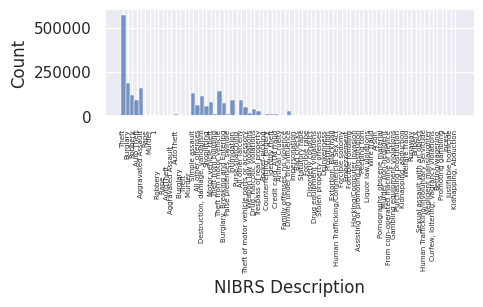

In [ ]:
from matplotlib import rcParams

sns.displot(data, x="NIBRS Description")
plt.xticks(rotation=90)
plt.tight_layout()
axes = plt. gca()
plt.xticks(fontsize = 5)
plt.show()

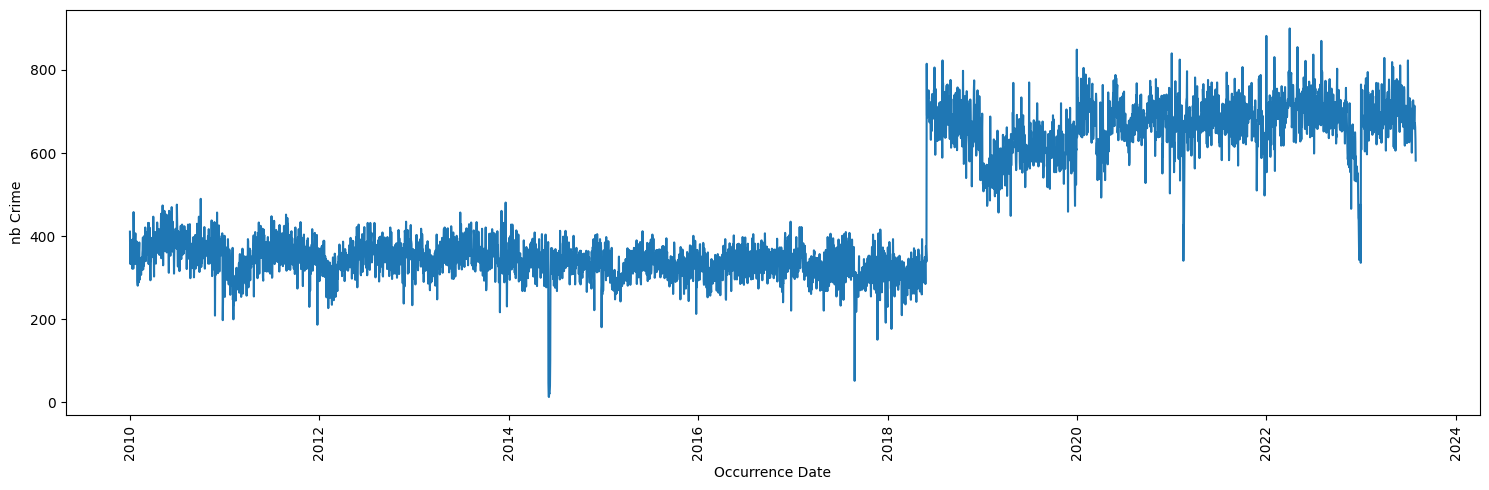

In [ ]:
# Plot one example
fig, ax = plt.subplots(figsize=(15,5))
line = sns.lineplot(x='Occurrence Date',
                    y='nb Crime',
                    data=data2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

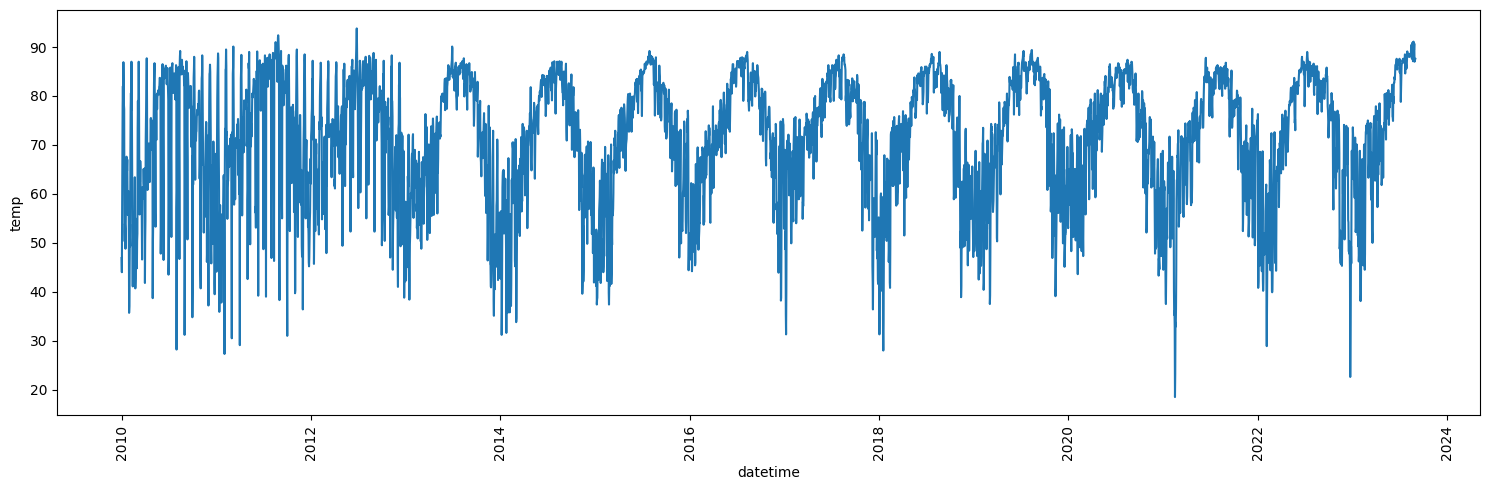

In [ ]:
# Plot one example
fig, ax = plt.subplots(figsize=(15,5))
line = sns.lineplot(x='datetime',
                    y='temp',
                    data=data)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Multivariate Analysis

In [ ]:
data.cov()

<ipython-input-51-72e63cb34c7c>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.cov()


,Offense Count,Incident,MapLongitude,MapLatitude
Offense Count,0.044755,-7.654604e+02,0.000260,-0.000088
Incident,-765.460442,2.502611e+15,22725.124998,24357.617513
MapLongitude,0.000260,2.272512e+04,0.012484,0.000017
MapLatitude,-0.000088,2.435762e+04,0.000017,0.008652


<ipython-input-52-d4f11c1e7380>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmin = -1, vmax = +1, annot = True, cmap = "coolwarm")


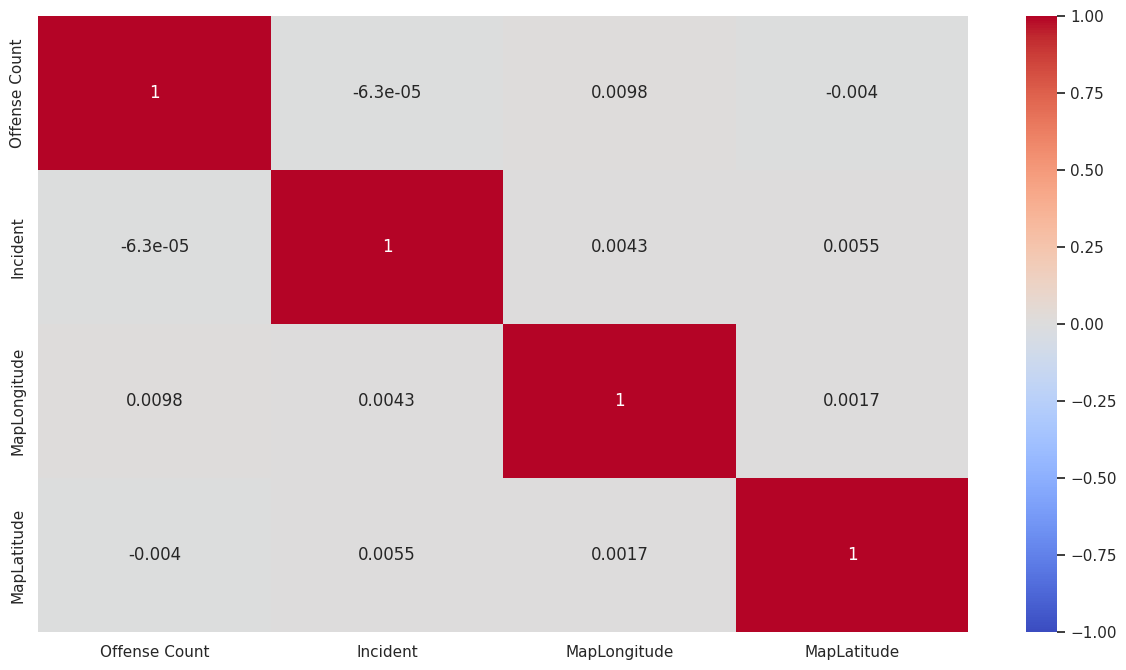

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), vmin = -1, vmax = +1, annot = True, cmap = "coolwarm")
plt.show()

In [ ]:
data.corr()

<ipython-input-53-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Offense Count,Incident,MapLongitude,MapLatitude
Offense Count,1.000000,-0.000063,0.009802,-0.003970
Incident,-0.000063,1.000000,0.004297,0.005532
MapLongitude,0.009802,0.004297,1.000000,0.001680
MapLatitude,-0.003970,0.005532,0.001680,1.000000


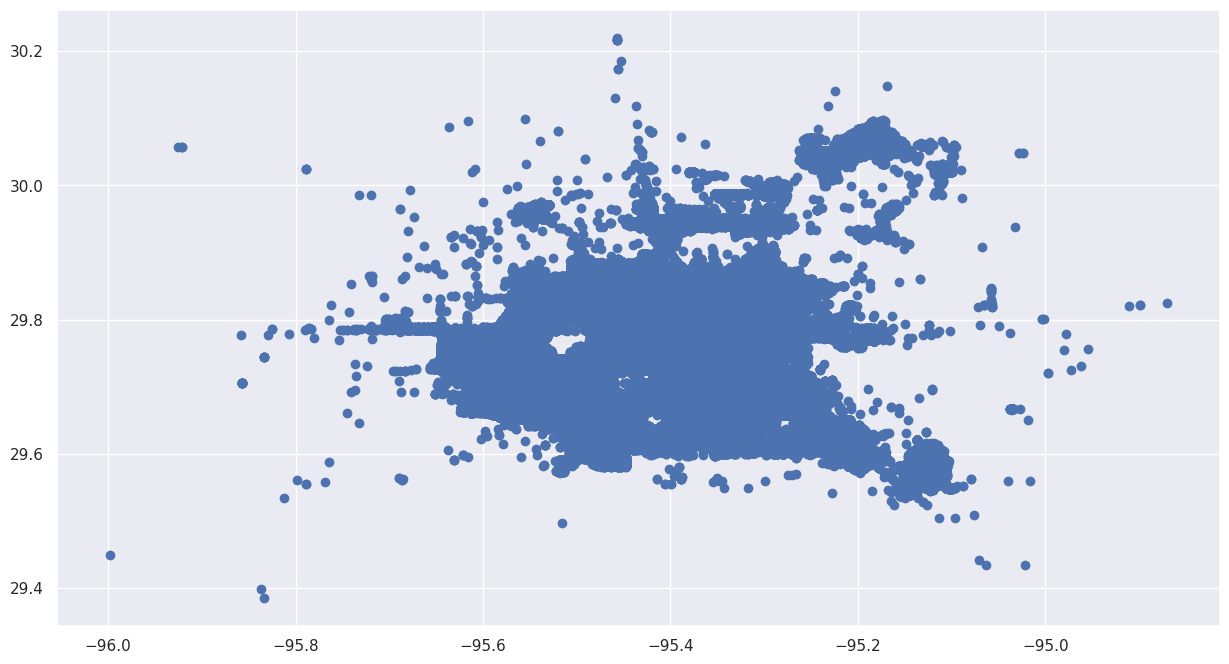

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=data['MapLongitude'], y=data['MapLatitude'])
plt.show()